## Observations and Insights 

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview

mouse_study_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [30]:
# Checking the number of mice.
mouse_study_data.nunique()["Mouse ID"]

249

In [31]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice=mouse_study_data.loc[mouse_study_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [32]:
duplicate=mouse_study_data.loc[mouse_study_data["Mouse ID"]=="g989"]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [33]:
# Optional: Get all the data for the duplicate mouse ID. 
clean_df=mouse_study_data[mouse_study_data["Mouse ID"].isin(duplicate_mice)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [36]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean=clean_df.mean()["Tumor Volume (mm3)"].round(2)
mean
median=clean_df.median()["Tumor Volume (mm3)"].round(2)
median
var=clean_df.var()["Tumor Volume (mm3)"].round(2)
var
std=clean_df.std()["Tumor Volume (mm3)"].round(2)
std
sem=clean_df.sem()["Tumor Volume (mm3)"].round(2)
sem

# Assemble the resulting series into a single summary dataframe.

mice_data_summary=pd.DataFrame({
    "Mean": [mean],
    "Median": [median],
    "Variance": [var],
    "Std Deviation": [std],
    "SEM": [sem]
})
mice_data_summary

,Mean,Median,Variance,Std Deviation,SEM
0,50.44,48.93,79.46,8.91,0.21


In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean_regimen=clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"].round(2)
mean_regimen
median_regimen=clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"].round(2)
median_regimen
var_regimen=clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"].round(2)
var_regimen
std_regimen=clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"].round(2)
std_regimen
SEM_regimen=clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"].round(2)
SEM_regimen
# Using the aggregation method, produce the same summary statistics in a single line

df=pd.DataFrame({"Mean": mean_regimen,
                 "Median": median_regimen,
                 "Variance": var_regimen,
                 "Std Deviation": std_regimen,
                 "SEM": SEM_regimen
                
                })
df_summary=df.agg(["mean"])
df_summary

,Mean,Median,Variance,Std Deviation,SEM
mean,50.976,49.903,47.858,6.821,0.502


## Bar and Pie Charts

(0.0, 27.0)

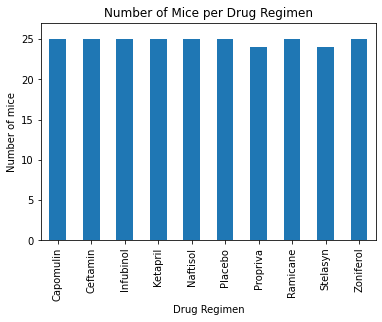

In [42]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

mice=clean_df.drop_duplicates(subset="Mouse ID", keep="first")
#groupby("Drug Regimen").count()
unique_mice=mice.groupby("Drug Regimen").count()["Mouse ID"]
unique_mice
UM_plot=unique_mice.plot.bar( title="Number of Mice per Drug Regimen")
UM_plot.set_ylabel("Number of mice")
UM_plot.set_ylim(0, 27)


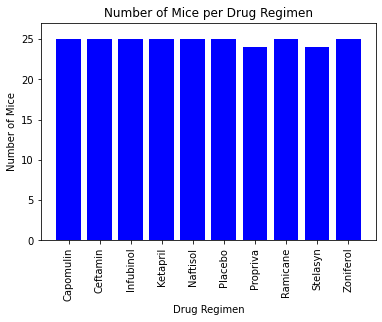

In [47]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
unique_mice=mice.groupby("Drug Regimen").count()["Mouse ID"]

x_axis=unique_mice.index.values
plt.bar(x_axis, unique_mice, color="b", align="center")
#ticks=[x for x in x_axis]
plt.xticks(rotation=90)
plt.title("Number of Mice per Drug Regimen")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.ylim(0, 27)
plt.show()

#add axis labels and title


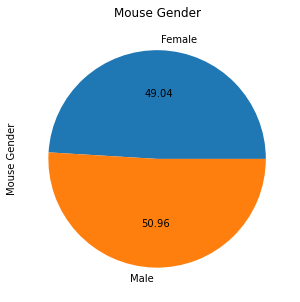

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_mice=clean_df.groupby("Sex").count()
g_mouse=gender_mice.rename(columns={"Mouse ID": "Mouse Gender"})
gen_mice=g_mouse["Mouse Gender"]
gender=["Female", "Male"]
gender_plot=gen_mice.plot.pie(autopct="%.2f", title="Mouse Gender", figsize=(5,5) )


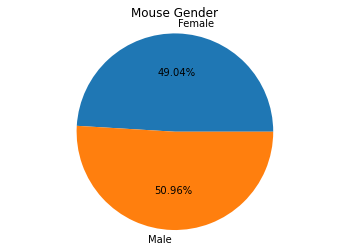

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gen_mice, labels= gender, autopct='%1.2f%%')
plt.axis('equal') 
plt.title("Mouse Gender")
plt.show()

#add title

## Quartiles, Outliers and Boxplots

In [48]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
tumor_df=clean_df.drop_duplicates(subset="Mouse ID", keep="last")
tumor_df
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#last_timepoint_df=clean_df.drop_duplicates(subset="Mouse ID", keep="last")["Timepoint"]

#last_timepoint_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#volume_timepoint_df=clean_df.drop_duplicates(subset="Mouse ID", keep="last")
#volume_timepoint_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [49]:
regimen=clean_df.groupby("Mouse ID").last()["Drug Regimen"]
regimen

tumor_vol=clean_df.groupby("Mouse ID").last()["Tumor Volume (mm3)"]
timepoint=clean_df.groupby("Mouse ID").last()["Timepoint"]

quartile_df=pd.DataFrame({"Regimen": regimen, "Tumor Volume": tumor_vol, "Timepoint": timepoint})
quartile_df

drugs=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
quartile_df=quartile_df.loc[quartile_df["Regimen"].isin(drugs)]
quartile_df


,Regimen,Tumor Volume,Timepoint
Mouse ID,,,
a203,Infubinol,67.973419,45
a251,Infubinol,65.525743,45
a275,Ceftamin,62.999356,45
a411,Ramicane,38.407618,45
a444,Ramicane,43.047543,45
...,...,...,...
y769,Ceftamin,68.594745,45
y793,Capomulin,31.896238,45
y865,Ceftamin,64.729837,45


In [32]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    drug_df=quartile_df.loc[quartile_df["Regimen"]==drug]
    tumor_volume=drug_df["Tumor Volume"]
    quartiles=tumor_volume.quantile([.25,.5,.75])
    quartiles
    lower_quart=quartiles[0.25]
    upper_quart=quartiles[0.75]
    interquartile=upper_quart-lower_quart
    upper_bound=upper_quart+1.5*interquartile
    lower_bound=lower_quart-1.5*interquartile
    outliers=drug_df.loc[(drug_df["Tumor Volume"]>upper_bound)|(drug_df["Tumor Volume"]<lower_bound)]
    
    print(lower_quart, upper_quart, interquartile, upper_bound, lower_bound, outliers)
    
    #if no outliers then don't print outliers
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

32.37735684 40.1592203 7.781863460000004 51.83201549 20.70456164999999 Empty DataFrame
Columns: [Regimen, Tumor Volume, Timepoint]
Index: []
31.56046955 40.65900627 9.098536719999998 54.30681135 17.912664470000003 Empty DataFrame
Columns: [Regimen, Tumor Volume, Timepoint]
Index: []
54.04860769 65.52574285 11.477135160000003 82.74144559000001 36.83290494999999             Regimen  Tumor Volume  Timepoint
Mouse ID                                    
c326      Infubinol     36.321346          5
48.72207785 64.29983003 15.577752179999997 87.66645829999999 25.355449580000002 Empty DataFrame
Columns: [Regimen, Tumor Volume, Timepoint]
Index: []


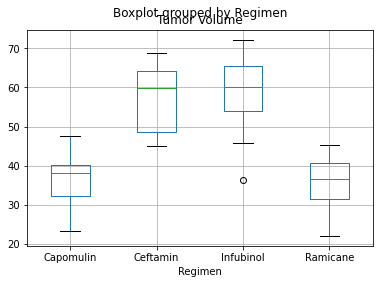

In [53]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
q_df=quartile_df.boxplot(by='Regimen', column="Tumor Volume")


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
